An NLTK sentiment analysis notebook 2024

In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('subjectivity')
nltk.download('movie_reviews')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\My-_-\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\My-_-\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\My-_-\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
# Test the analyzer with a piece of text
sia.polarity_scores('I am a positive and happy human')

{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.8074}

In [17]:
# Now test the analyzer with a negative piece of  text
sia.polarity_scores('I am angry and dislike the taste of delicious chicken greatly')

{'neg': 0.355, 'neu': 0.422, 'pos': 0.223, 'compound': -0.296}

# Use Financial Tweets for Sentiment Analysis

In [3]:
import pandas as pd

# the dataset has some errors in it, so we tell pandas to skip those lines
ft_data = pd.read_csv('./data/stockerbot-export.csv', on_bad_lines='skip')

In [4]:
# preview the dataset
ft_data.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [6]:
ft_data['symbols'].value_counts()

symbols
NFLX        101
AMAT        100
MTB         100
MOMO        100
ES          100
           ... 
INTC-USB      1
AMZN-GPS      1
M             1
GS            1
TWTR          1
Name: count, Length: 453, dtype: int64

In [11]:
# Get Netflix related tweets
netflix_tweets = ft_data[ft_data['symbols'] == 'NFLX']
netflix_tweets_sorted = netflix_tweets.sort_values(by='timestamp')

In [12]:
netflix_tweets_sorted.head()

,id,text,timestamp,source,symbols,company_names,url,verified
26216,1019690098236055600,Netflix $NFLX just released quarterly 10-Q. Q...,Wed Jul 18 21:07:19 +0000 2018,Feedmeistercom,NFLX,Netflix,NaN,False
26223,1019690300187533300,RT @blackbullforex: Excluding FAANG Stocks The...,Wed Jul 18 21:08:07 +0000 2018,dexoidan,NFLX,Netflix,NaN,False
26236,1019690538398707700,RT @RampCapitalLLC: Here is where $FANG was tr...,Wed Jul 18 21:09:03 +0000 2018,hs_traders,NFLX,Netflix,NaN,False
26239,1019690604559851500,RT @SevenPointsCap: Trader Takeaways 7.18.18 b...,Wed Jul 18 21:09:19 +0000 2018,clovisskyline,NFLX,Netflix,http://youtu.be/MLmX7WMEBVM?a,False
26241,1019690654383759400,#NASDAQ MOST VOLUME $HMNY -9.09% [Volume: +82...,Wed Jul 18 21:09:31 +0000 2018,Market_Scanner,NFLX,Netflix,https://twitter.com/i/web/status/1019690654383...,False


In [19]:
compound_scores = []

for index, row in netflix_tweets_sorted.iterrows():
  tweet = row['text']
  analysis = sia.polarity_scores(tweet)
  compound_scores.append(analysis['compound'])

print(compound_scores)

[0.4545, -0.296, 0.5719, 0.0, 0.0, 0.0, -0.296, 0.5719, 0.6166, 0.4563, 0.5319, 0.5719, 0.0, 0.0, 0.3612, 0.3612, 0.3612, 0.7003, 0.3612, 0.0, 0.0, 0.1779, 0.0, 0.3612, 0.3612, -0.6249, 0.0, 0.5719, 0.5319, -0.4019, 0.0, -0.4215, 0.6114, -0.6249, 0.0, 0.0, 0.0772, 0.4563, 0.0, -0.2732, 0.0, -0.4215, -0.7855, -0.4782, 0.3818, 0.4404, 0.0, 0.0, 0.34, -0.0516, 0.0, 0.5719, 0.5423, 0.0, 0.4215, 0.0772, 0.0, 0.0, 0.6369, -0.4019, 0.8159, -0.3612, -0.4215, 0.5719, 0.5267, 0.0, 0.0, 0.1007, 0.6166, 0.5267, 0.0, 0.0, 0.0, 0.6808, -0.3459, 0.7003, 0.0, 0.4576, 0.5719, 0.0, 0.4767, 0.0, 0.0, 0.0, -0.3818, 0.0, 0.5719, 0.0, 0.5719, 0.6114, 0.0, 0.0, 0.875, -0.625, 0.0, 0.0, 0.0, 0.875, 0.0, 0.0, 0.4404]


# Plot the Netflix sentiment

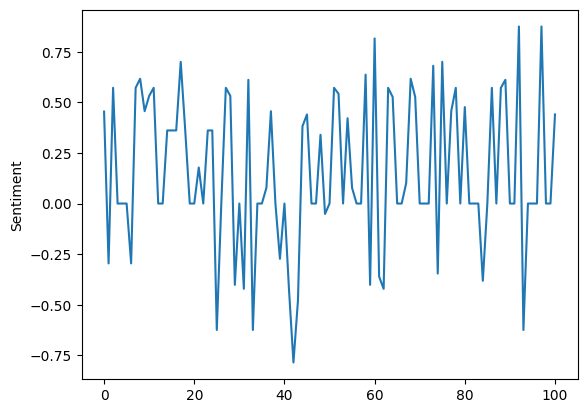

In [22]:
import matplotlib.pyplot as plt

plt.plot(compound_scores)
plt.ylabel('Sentiment')
plt.show()

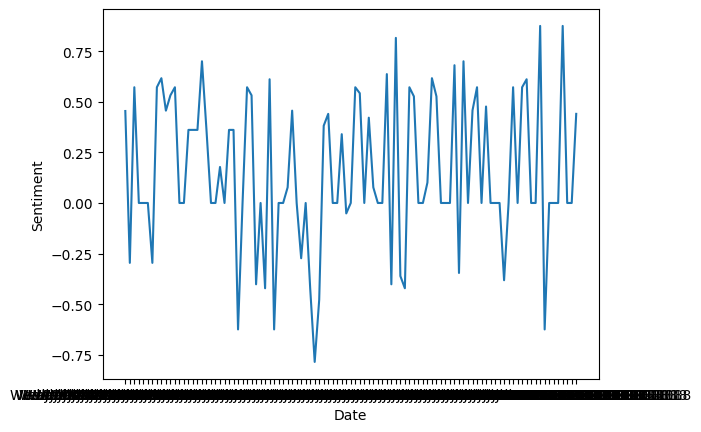

In [36]:
import matplotlib.dates as mdates


plt.plot(netflix_tweets_sorted['timestamp'], compound_scores)
plt.ylabel('Sentiment')
plt.xlabel('Date')

# reduce the number of x axis ticks
# Get the x-axis limits
# x_min, x_max = plt.xlim()

# Calculate the interval for 4 ticks
# interval = (x_max - x_min) / 4

# Set the x-axis ticks and labels
# plt.xticks([x_min + i * interval for i in range(3)],
#           [mdates.num2date(x).strftime('%m/%y') for x in plt.xticks()[0]])

# format the x axis for better clarity
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

plt.show()